In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.transforms as T
from torchvision import datasets
from torchvision.utils import make_grid

import random

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from torchsummary import summary


from utils import get_mean_std, get_default_device, show_batch, misclassified_images,plot_metrics,class_level_accuracy,seed_everything

from model import CIFAR10Model
from transforms import apply_transforms
from trainer import train,test

In [2]:
seed_everything(42)

In [3]:
dataset_mean_std = datasets.CIFAR10(root='data/', train=True, download=True, transform=T.ToTensor())

Files already downloaded and verified


In [4]:
mean,std=get_mean_std(dataset_mean_std)

100%|██████████| 782/782 [00:05<00:00, 131.63it/s]


In [5]:
mean,std

(tensor([0.4914, 0.4822, 0.4466]), tensor([0.2470, 0.2435, 0.2616]))

In [6]:
train_transforms, test_transforms = apply_transforms(mean,std)

In [7]:
train_dataset = datasets.CIFAR10(root='data/', train=True, download=True, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=test_transforms)

Files already downloaded and verified


In [8]:
labels = train_dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

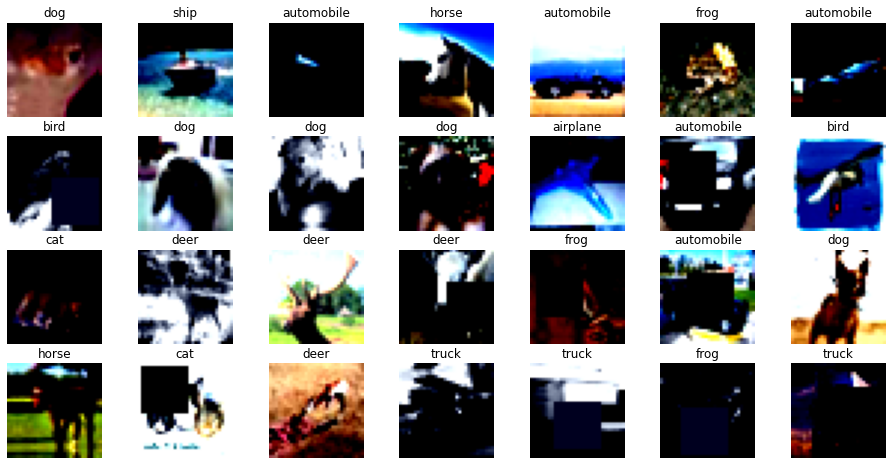

In [10]:
show_batch(train_loader,labels)

In [11]:
device = get_default_device()
device

device(type='cuda')

In [12]:
model = CIFAR10Model().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 15, 15]           9,248
             ReLU-10           [-1, 32, 15, 15]               0
      BatchNorm2d-11           [-1, 32, 15, 15]              64
        Dropout2d-12           [-1, 32, 15, 15]               0
           Conv2d-13           [-1, 32, 15, 15]           9,216
             ReLU-14           [-1, 32,

In [13]:
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []
lrs = []

epochs = 100
l1_factor = 0
l2_factor = 0.0001
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = F.nll_loss


In [14]:
for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train(model, device, train_loader, optimizer, epochs, train_accuracy, train_losses, l1_factor, criterion, lrs)
    test(model, device, test_loader, test_accuracy, test_losses, criterion)

 0%|          | 0/391 [00:00<?, ?it/s]
: Average Test loss: 0.0044, Test Accuracy: 8113/10000 (81.13%)

Epoch 19:
Train Loss=0.7510941028594971 Batch_id=390 LR= 0.01000 Train Accuracy= 76.58: 100%|██████████| 391/391 [00:11<00:00, 34.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
: Average Test loss: 0.0044, Test Accuracy: 8076/10000 (80.76%)

Epoch 20:
Train Loss=0.6833857893943787 Batch_id=390 LR= 0.01000 Train Accuracy= 76.89: 100%|██████████| 391/391 [00:11<00:00, 32.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
: Average Test loss: 0.0044, Test Accuracy: 8106/10000 (81.06%)

Epoch 21:
Train Loss=0.9545849561691284 Batch_id=390 LR= 0.01000 Train Accuracy= 76.97: 100%|██████████| 391/391 [00:12<00:00, 32.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]
: Average Test loss: 0.0045, Test Accuracy: 8071/10000 (80.71%)

Epoch 22:
Train Loss=0.6259615421295166 Batch_id=390 LR= 0.01000 Train Accuracy= 77.35: 100%|██████████| 391/391 [00:12<00:00, 32.06it/s]
  0%|          | 0/391 [00:00

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

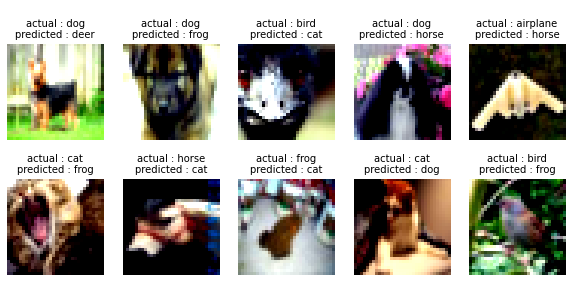

In [16]:
misclassified_images(model,test_loader,device)

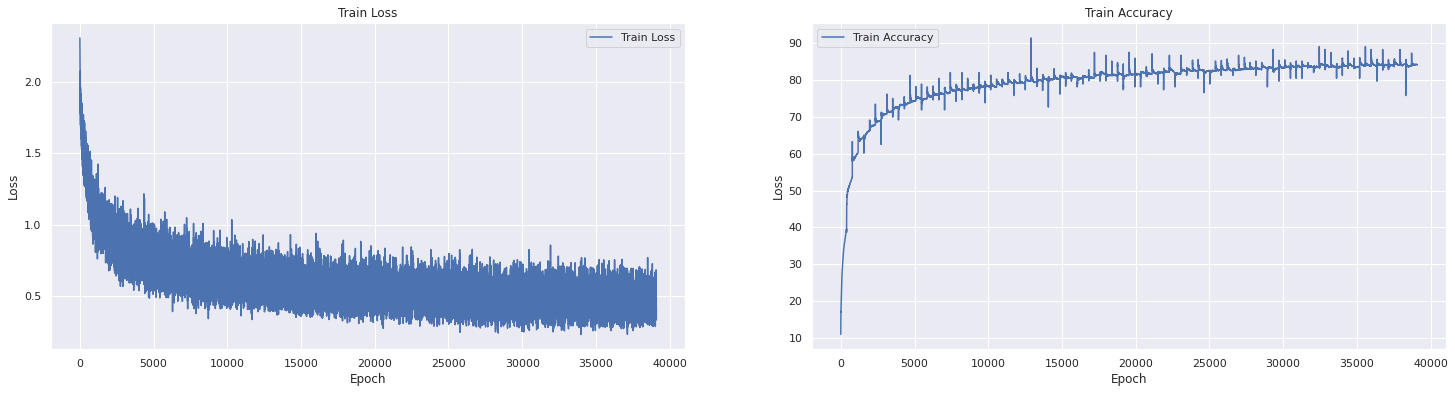

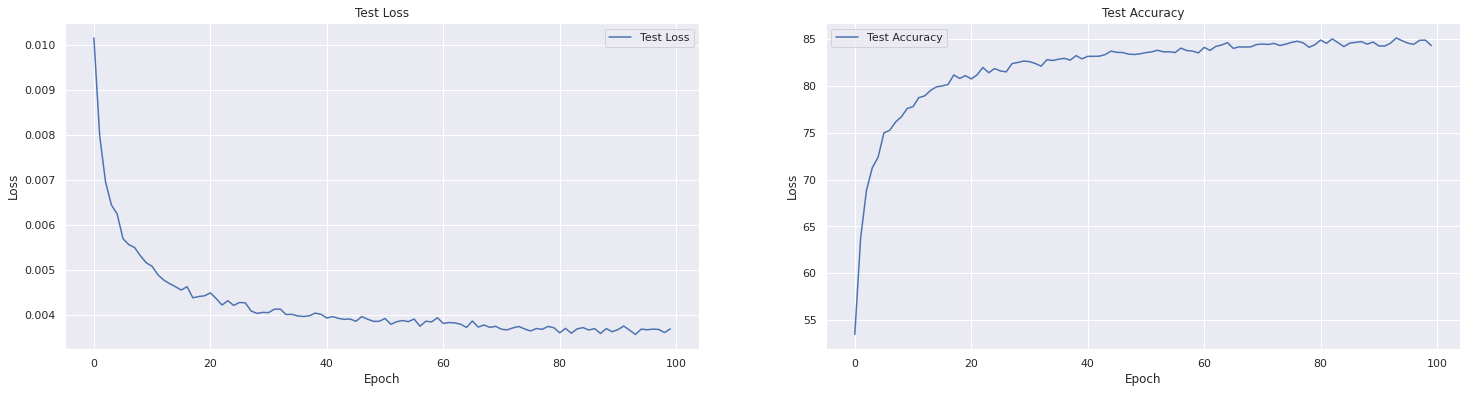

In [17]:
plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [20]:
class_level_accuracy(model, test_loader, device, labels)

Accuracy of airplane : 88 %
Accuracy of automobile : 93 %
Accuracy of  bird : 76 %
Accuracy of   cat : 68 %
Accuracy of  deer : 84 %
Accuracy of   dog : 76 %
Accuracy of  frog : 91 %
Accuracy of horse : 89 %
Accuracy of  ship : 91 %
Accuracy of truck : 91 %


In [18]:
torch.save(model,'model_2.pt')